In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os as os
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
plt.style.use('seaborn')

In [2]:
os.getcwd()

'/content'

In [0]:
# Reading the Train and Test files
train_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Ghouls/train.csv')
test_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Ghouls/test.csv')
submission = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Ghouls/sample_submission.csv')
submission["type"] = "Unknown"

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 7 columns):
id               371 non-null int64
bone_length      371 non-null float64
rotting_flesh    371 non-null float64
hair_length      371 non-null float64
has_soul         371 non-null float64
color            371 non-null object
type             371 non-null object
dtypes: float64(4), int64(1), object(2)
memory usage: 20.4+ KB


In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529 entries, 0 to 528
Data columns (total 6 columns):
id               529 non-null int64
bone_length      529 non-null float64
rotting_flesh    529 non-null float64
hair_length      529 non-null float64
has_soul         529 non-null float64
color            529 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 24.9+ KB


In [6]:
print("Train Data Null Values Count \n",train_df.isna().sum())
print("Test Data Null Values Count \n",test_df.isna().sum())

Train Data Null Values Count 
 id               0
bone_length      0
rotting_flesh    0
hair_length      0
has_soul         0
color            0
type             0
dtype: int64
Test Data Null Values Count 
 id               0
bone_length      0
rotting_flesh    0
hair_length      0
has_soul         0
color            0
dtype: int64


In [0]:
train_data = train_df.drop(columns=['id'],axis=1)

In [0]:
test_data = test_df.drop(columns=['id'])

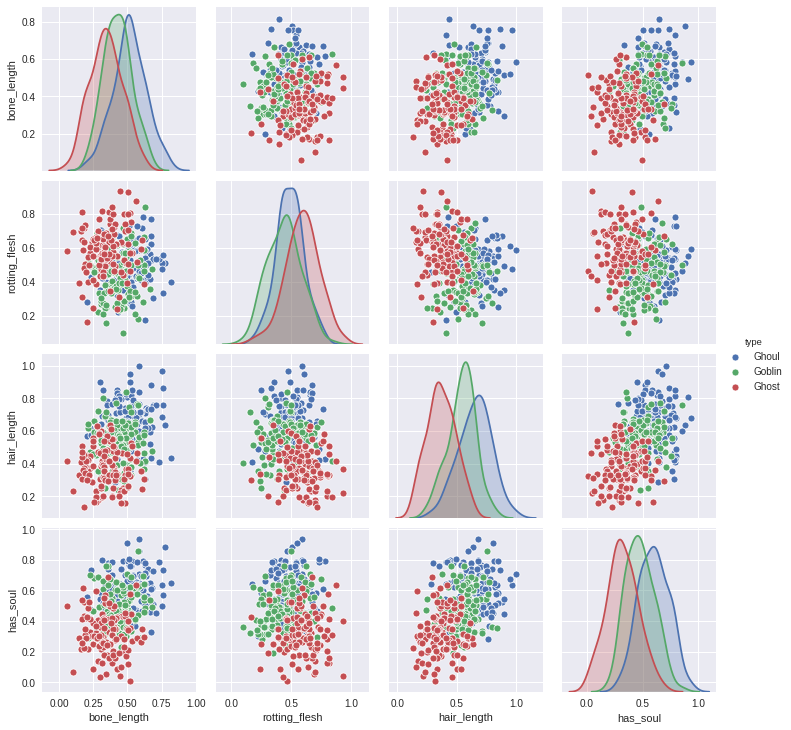

In [9]:
sns.pairplot(train_data,hue="type")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


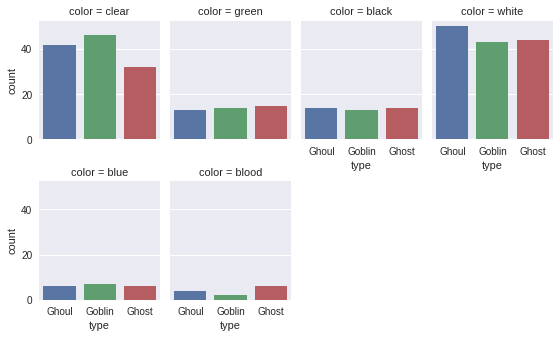

In [13]:
sns.factorplot("type", col="color", col_wrap=4, data=train_data, kind="count", size=2.4, aspect=.8)

In [10]:
train_data.type.value_counts()

Ghoul     129
Goblin    125
Ghost     117
Name: type, dtype: int64

In [0]:
train_data['hair_soul'] = train_data['hair_length'] * train_data['has_soul']
train_data['hair_bone'] = train_data['hair_length'] * train_data['bone_length']
train_data['hair2'] = train_data['hair_length'] * train_data['hair_length']
train_data['soul2'] = train_data['has_soul'] * train_data['has_soul']
train_data['bone2'] = train_data['bone_length'] * train_data['bone_length']
train_data['flesh2'] = train_data['rotting_flesh'] * train_data['rotting_flesh']
test_data['hair_soul'] = test_data['hair_length'] * test_data['has_soul']
test_data['hair_bone'] = test_data['hair_length'] * test_data['bone_length']
test_data['hair2'] = test_data['hair_length'] * test_data['hair_length']
test_data['soul2'] = test_data['has_soul'] * test_data['has_soul']
test_data['bone2'] = test_data['bone_length'] * test_data['bone_length']
test_data['flesh2'] = test_data['rotting_flesh'] * test_data['rotting_flesh']
train_data['hair_soul_bone'] = train_data['hair_length'] * train_data['has_soul'] * train_data['bone_length']
test_data['hair_soul_bone'] = test_data['hair_length'] * test_data['has_soul'] * test_data['bone_length']

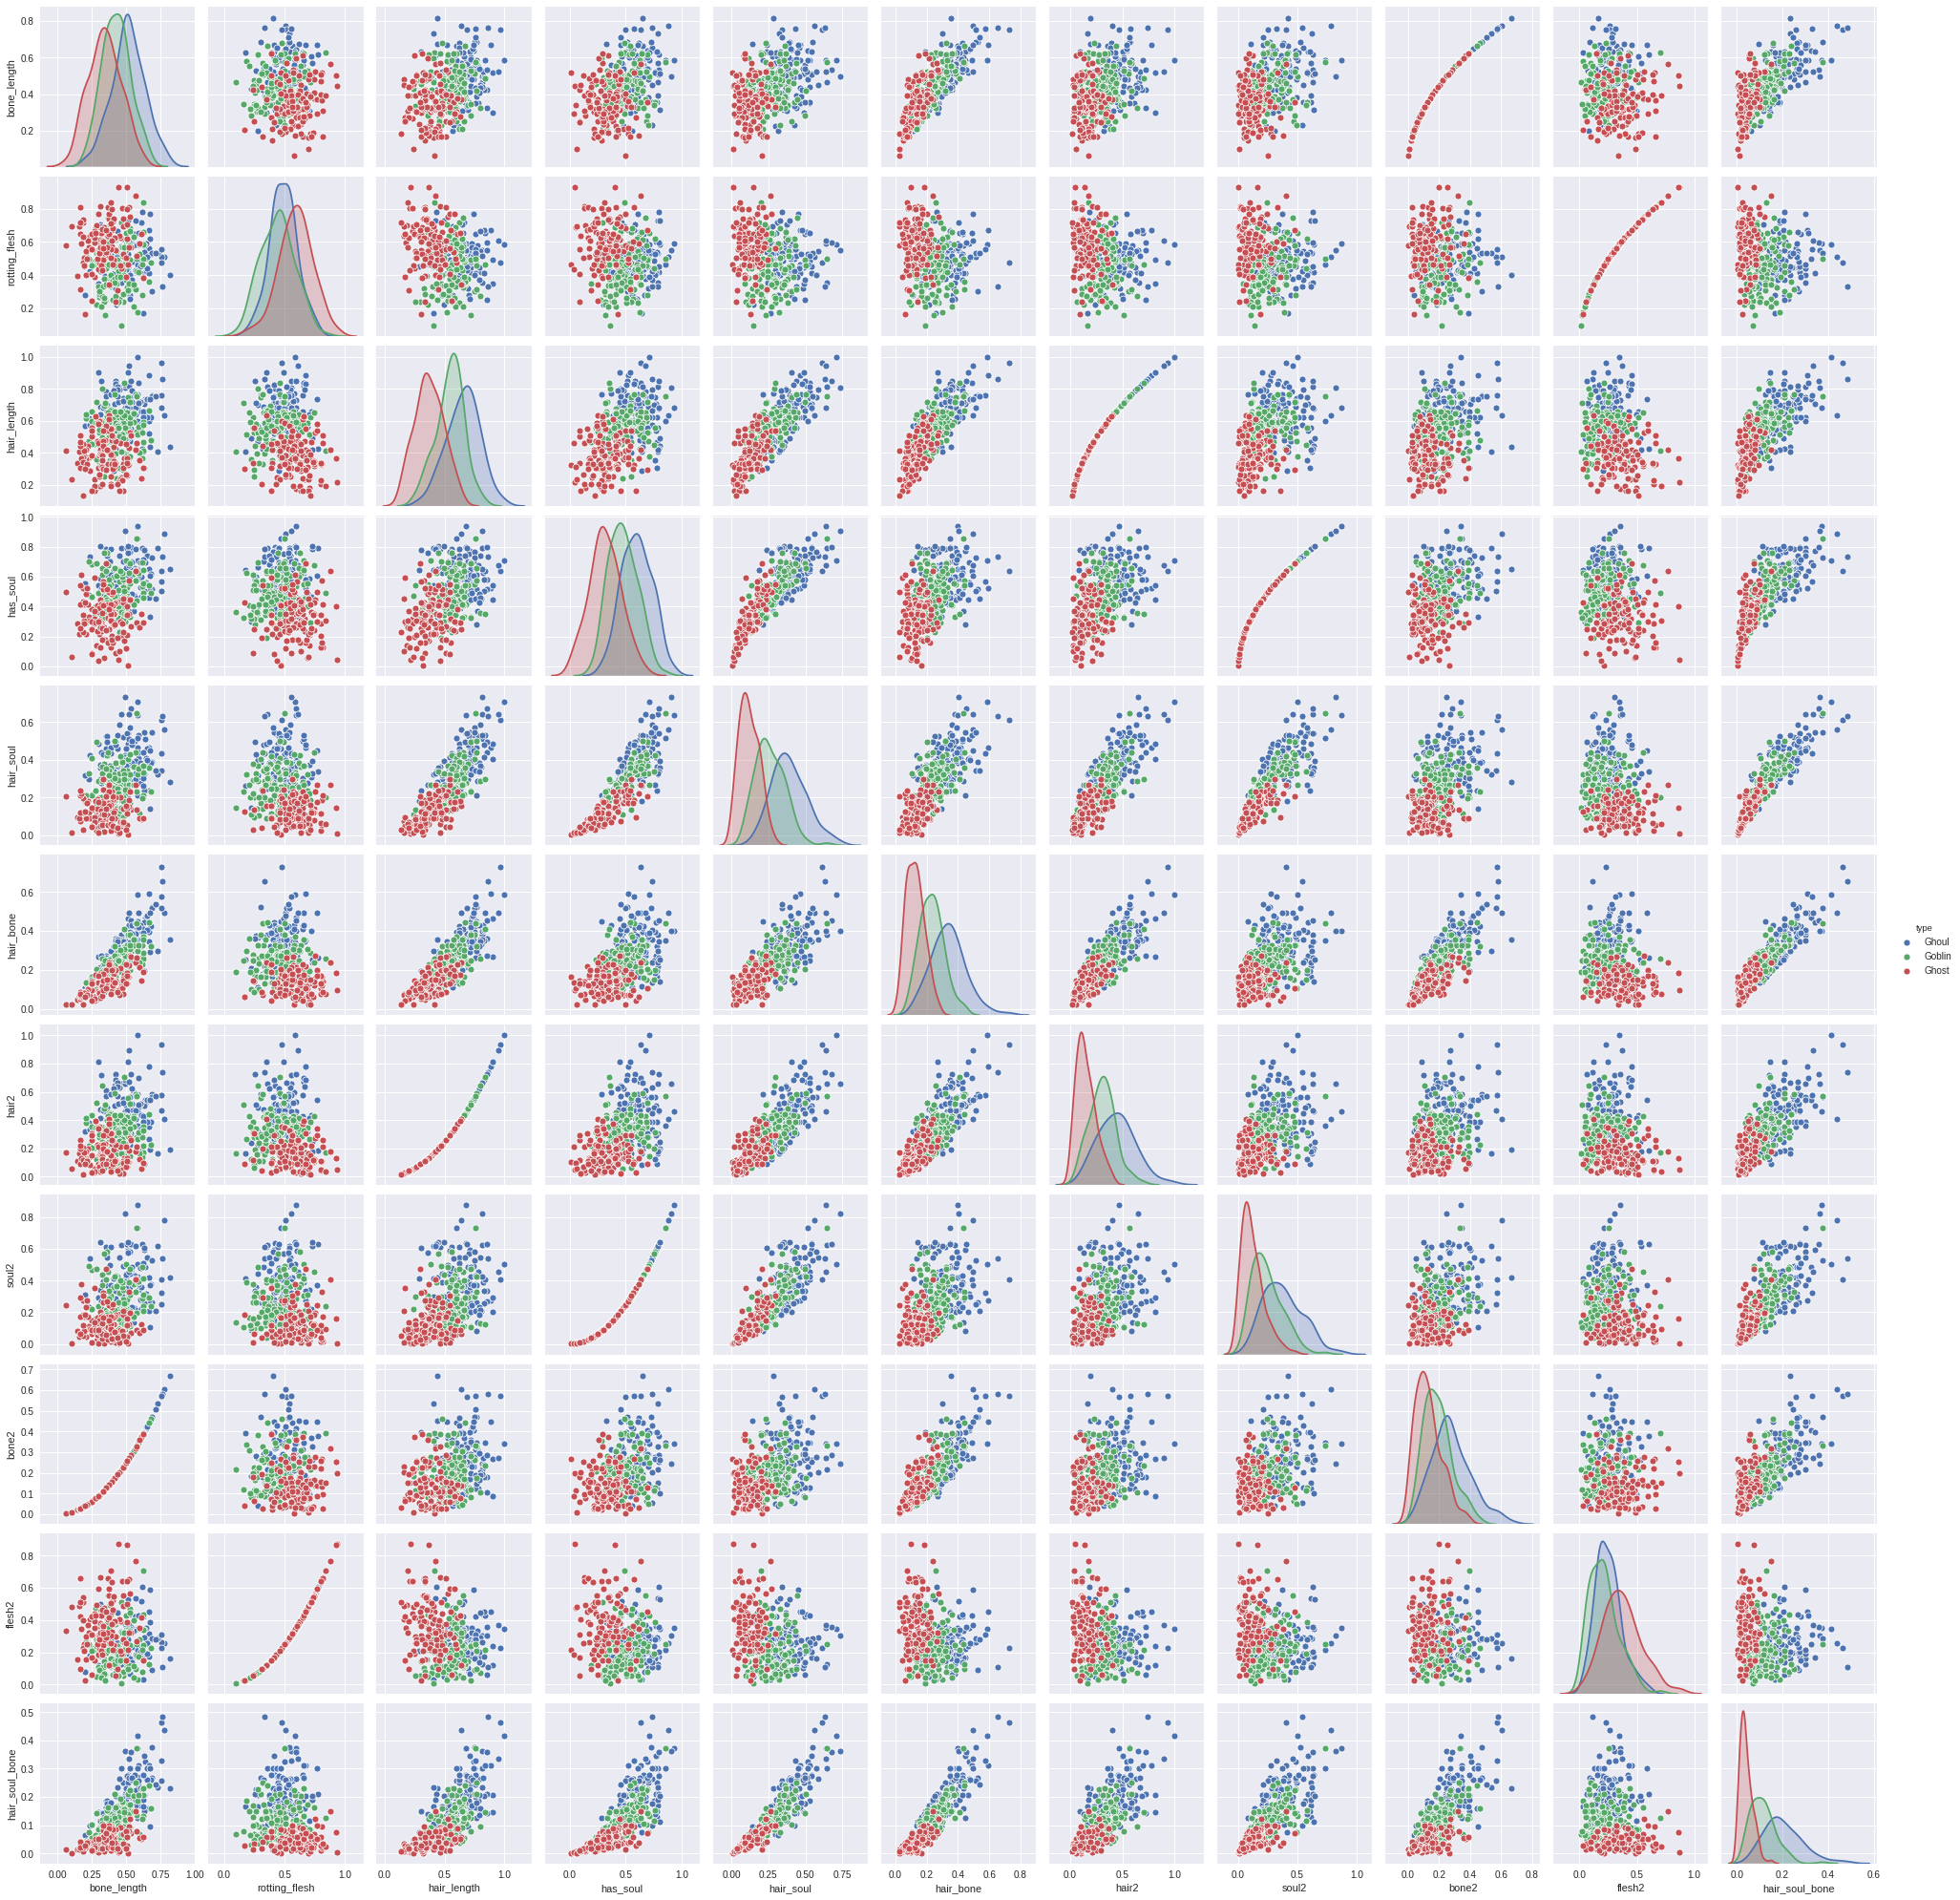

In [12]:
sns.pairplot(train_data,hue='type')

In [0]:
train_data=train_data.drop(columns=['flesh2'])
test_data=test_data.drop(columns=['flesh2'])

In [16]:
train_data.describe()

,bone_length,rotting_flesh,hair_length,has_soul,hair_soul,hair_bone,hair2,soul2,bone2,hair_soul_bone
count,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000
mean,0.434160,0.506848,0.529114,0.471392,0.263591,0.237685,0.308751,0.253148,0.206092,0.122980
std,0.132833,0.146358,0.169902,0.176129,0.147773,0.121264,0.182872,0.169753,0.118691,0.090597
min,0.061032,0.095687,0.134600,0.009402,0.003026,0.023789,0.018117,0.000088,0.003725,0.001534
25%,0.340006,0.414812,0.407428,0.348002,0.143652,0.143756,0.165998,0.121106,0.115604,0.051589
50%,0.434891,0.501552,0.538642,0.466372,0.244232,0.226107,0.290136,0.217503,0.189130,0.102233
75%,0.517223,0.603977,0.647244,0.600610,0.365027,0.319040,0.418925,0.360732,0.267520,0.171119
max,0.817001,0.932466,1.000000,0.935721,0.734639,0.729292,1.000000,0.875574,0.667491,0.482434


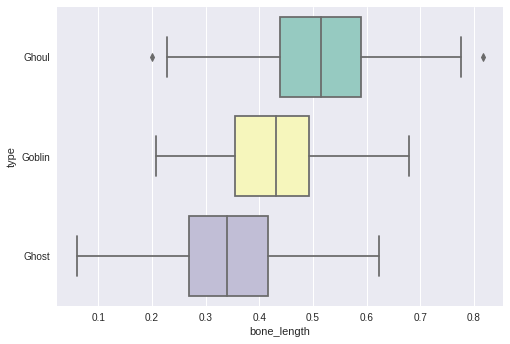

In [18]:
sns.boxplot(y="type", x="bone_length", data=train_data,palette="Set3")
plt.show()

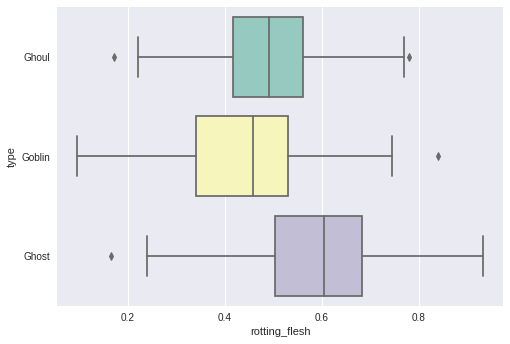

In [19]:
sns.boxplot(y="type", x="rotting_flesh", data=train_data,palette="Set3")
plt.show()

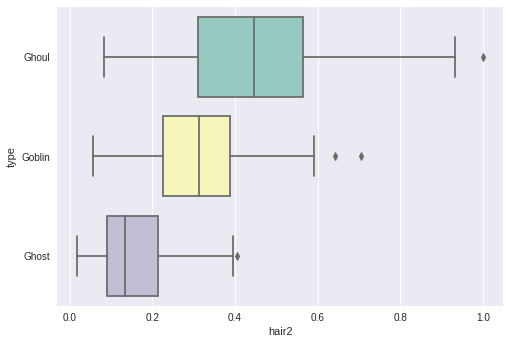

In [21]:
sns.boxplot(y="type", x="hair2", data=train_data,palette="Set3")
plt.show()


In [17]:
train_data.head()

,bone_length,rotting_flesh,hair_length,has_soul,color,type,hair_soul,hair_bone,hair2,soul2,bone2,hair_soul_bone
0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul,0.363825,0.165118,0.216933,0.610182,0.125679,0.128980
1,0.575560,0.425868,0.531401,0.439899,green,Goblin,0.233763,0.305853,0.282387,0.193511,0.331269,0.134545
2,0.467875,0.354330,0.811616,0.791225,black,Ghoul,0.642171,0.379735,0.658721,0.626037,0.218907,0.300456
3,0.776652,0.508723,0.636766,0.884464,black,Ghoul,0.563196,0.494546,0.405470,0.782276,0.603189,0.437408
4,0.566117,0.875862,0.418594,0.636438,green,Ghost,0.266409,0.236973,0.175221,0.405053,0.320488,0.150818


In [18]:
le = LabelEncoder()
train_data['type'] = le.fit_transform(train_data['type'])
print(train_data.type.value_counts())

1    129
2    125
0    117
Name: type, dtype: int64


In [19]:
print(train_data)

     bone_length  rotting_flesh  ...     bone2  hair_soul_bone
0       0.354512       0.350839  ...  0.125679        0.128980
1       0.575560       0.425868  ...  0.331269        0.134545
2       0.467875       0.354330  ...  0.218907        0.300456
3       0.776652       0.508723  ...  0.603189        0.437408
4       0.566117       0.875862  ...  0.320488        0.150818
..           ...            ...  ...       ...             ...
366     0.458132       0.391760  ...  0.209885        0.192383
367     0.331936       0.564836  ...  0.110182        0.098705
368     0.481640       0.501147  ...  0.231977        0.130076
369     0.294943       0.771286  ...  0.086991        0.051736
370     0.670200       0.768469  ...  0.449167        0.300615

[371 rows x 12 columns]


In [0]:
train_data_x = train_data.drop(columns=['type'],axis=1)
train_data_y = train_data['type'].values

In [21]:
print(train_data_x)

     bone_length  rotting_flesh  ...     bone2  hair_soul_bone
0       0.354512       0.350839  ...  0.125679        0.128980
1       0.575560       0.425868  ...  0.331269        0.134545
2       0.467875       0.354330  ...  0.218907        0.300456
3       0.776652       0.508723  ...  0.603189        0.437408
4       0.566117       0.875862  ...  0.320488        0.150818
..           ...            ...  ...       ...             ...
366     0.458132       0.391760  ...  0.209885        0.192383
367     0.331936       0.564836  ...  0.110182        0.098705
368     0.481640       0.501147  ...  0.231977        0.130076
369     0.294943       0.771286  ...  0.086991        0.051736
370     0.670200       0.768469  ...  0.449167        0.300615

[371 rows x 11 columns]


In [22]:
train_data_x.head()

,bone_length,rotting_flesh,hair_length,has_soul,color,hair_soul,hair_bone,hair2,soul2,bone2,hair_soul_bone
0,0.354512,0.350839,0.465761,0.781142,clear,0.363825,0.165118,0.216933,0.610182,0.125679,0.128980
1,0.575560,0.425868,0.531401,0.439899,green,0.233763,0.305853,0.282387,0.193511,0.331269,0.134545
2,0.467875,0.354330,0.811616,0.791225,black,0.642171,0.379735,0.658721,0.626037,0.218907,0.300456
3,0.776652,0.508723,0.636766,0.884464,black,0.563196,0.494546,0.405470,0.782276,0.603189,0.437408
4,0.566117,0.875862,0.418594,0.636438,green,0.266409,0.236973,0.175221,0.405053,0.320488,0.150818


In [0]:
from sklearn import preprocessing
mm_scaler = preprocessing.MinMaxScaler()
train_data_minmax = mm_scaler.fit_transform(train_data_x.drop(columns=['color']))

In [0]:
train_data_minmax = pd.DataFrame(train_data_minmax)

In [25]:
train_data_minmax.head()

,0,1,2,3,4,5,6,7,8,9
0,0.388217,0.304922,0.382668,0.833125,0.493156,0.200323,0.202484,0.696863,0.183730,0.265017
1,0.680620,0.394586,0.458518,0.464739,0.315381,0.399806,0.269146,0.220932,0.493463,0.276587
2,0.538175,0.309094,0.782316,0.844010,0.873611,0.504528,0.652424,0.714973,0.324184,0.621589
3,0.946626,0.493602,0.580270,0.944665,0.765665,0.667264,0.394500,0.893432,0.903125,0.906371
4,0.668128,0.932355,0.328164,0.676911,0.360003,0.302173,0.160002,0.462560,0.477221,0.310428


In [26]:
train_data_minmax.columns

RangeIndex(start=0, stop=10, step=1)

In [0]:
train_data_minmax.columns=['bone_length','rotting_flesh','hair_length','has_soul','hair_soul','hair_bone','hair_soul_bone','hair2','soul2','bone2']

In [28]:
train_data_minmax.columns

Index(['bone_length', 'rotting_flesh', 'hair_length', 'has_soul', 'hair_soul',
       'hair_bone', 'hair_soul_bone', 'hair2', 'soul2', 'bone2'],
      dtype='object')

In [34]:
train_data_minmax.describe()

,bone_length,rotting_flesh,hair_length,has_soul,hair_soul,hair_bone,hair_soul_bone,hair2,soul2,bone2
count,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000
mean,0.493576,0.491362,0.455875,0.498738,0.356152,0.303182,0.295996,0.289051,0.304877,0.252540
std,0.175712,0.174906,0.196328,0.190139,0.201983,0.171883,0.186246,0.193895,0.178814,0.188391
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.369028,0.381374,0.315262,0.365533,0.192214,0.170045,0.150609,0.138229,0.168552,0.104086
50%,0.494543,0.485032,0.466885,0.493318,0.329691,0.286771,0.277038,0.248335,0.279323,0.209398
75%,0.603451,0.607436,0.592378,0.638234,0.494799,0.418496,0.408204,0.411936,0.397421,0.352641
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


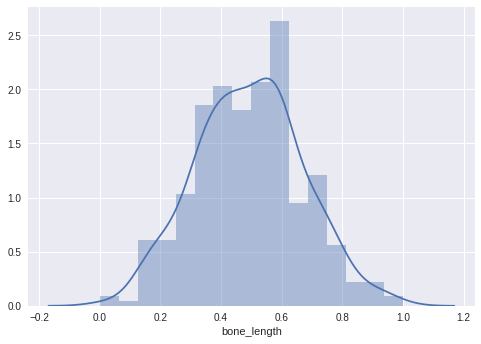

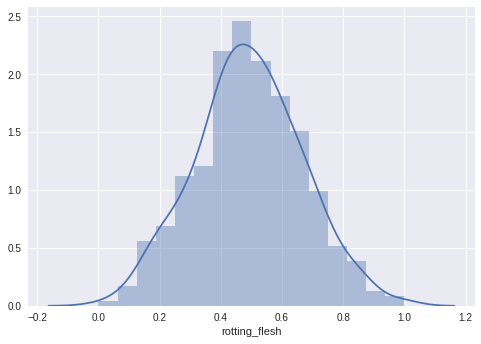

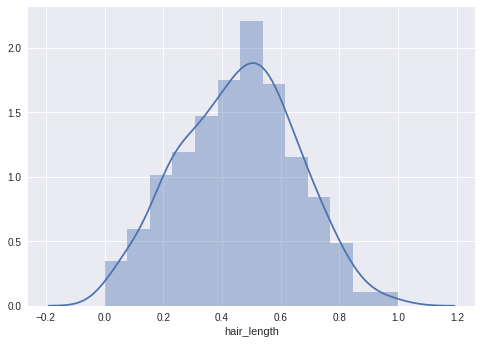

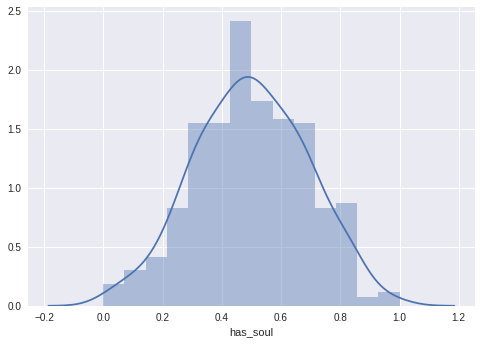

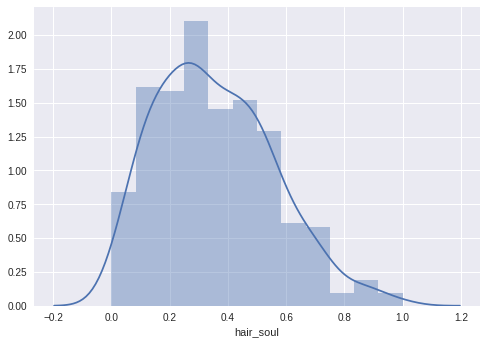

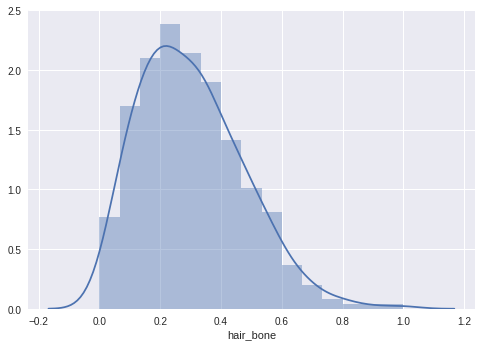

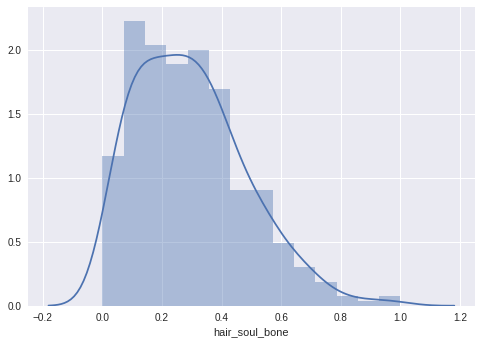

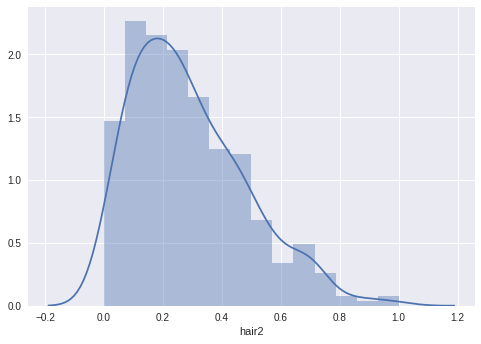

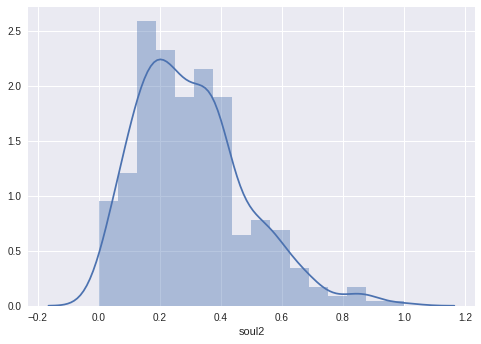

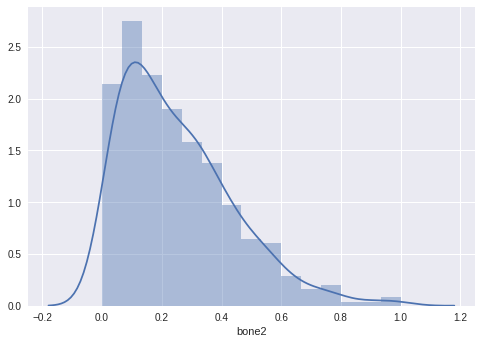

In [31]:
for col in train_data_minmax.columns:
    sns.distplot(train_data_minmax[col])
    plt.show()

In [0]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(train_data_minmax)
train_data_sc=sc.transform(train_data_minmax)

In [35]:
train_data_sc=pd.DataFrame(train_data_sc)
train_data_sc.columns=['bone_length','rotting_flesh','hair_length','has_soul','hair_soul','hair_bone','hair_soul_bone','hair2','soul2','bone2']
train_data_sc.describe()

,bone_length,rotting_flesh,hair_length,has_soul,hair_soul,hair_bone,hair_soul_bone,hair2,soul2,bone2
count,3.710000e+02,3.710000e+02,3.710000e+02,3.710000e+02,3.710000e+02,3.710000e+02,3.710000e+02,3.710000e+02,3.710000e+02,3.710000e+02
mean,9.216946e-17,9.516197e-17,-9.276796e-17,-4.147626e-16,-3.920195e-16,-1.232916e-16,-1.017455e-17,6.972560e-17,9.336646e-17,3.591018e-17
std,1.001350e+00,1.001350e+00,1.001350e+00,1.001350e+00,1.001350e+00,1.001350e+00,1.001350e+00,1.001350e+00,1.001350e+00,1.001350e+00
min,-2.812794e+00,-2.813087e+00,-2.325147e+00,-2.626560e+00,-1.765662e+00,-1.766267e+00,-1.591419e+00,-1.492770e+00,-1.707294e+00,-1.342318e+00
25%,-7.097745e-01,-6.296927e-01,-7.171824e-01,-7.015086e-01,-8.127412e-01,-7.756293e-01,-7.816699e-01,-7.789035e-01,-7.634123e-01,-7.890701e-01
50%,5.511799e-03,-3.623915e-02,5.615618e-02,-2.854236e-02,-1.311808e-01,-9.560636e-02,-1.019303e-01,-2.102705e-01,-1.430989e-01,-2.293076e-01
75%,6.261617e-01,6.645339e-01,6.962239e-01,7.346441e-01,6.873570e-01,6.717915e-01,6.032823e-01,6.346247e-01,5.182415e-01,5.320683e-01
max,2.886017e+00,2.911991e+00,2.775259e+00,2.639857e+00,3.191947e+00,4.059490e+00,3.785067e+00,3.671616e+00,3.892651e+00,3.972956e+00


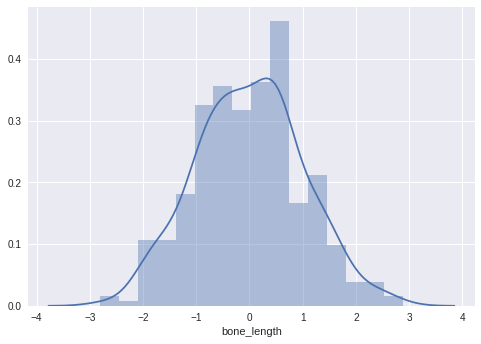

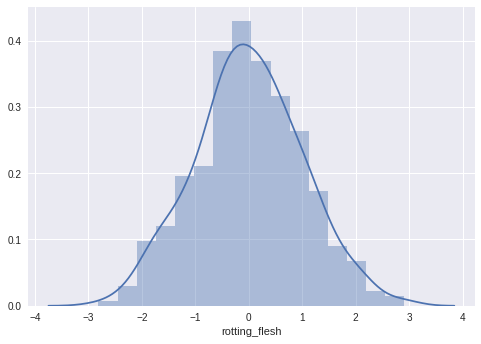

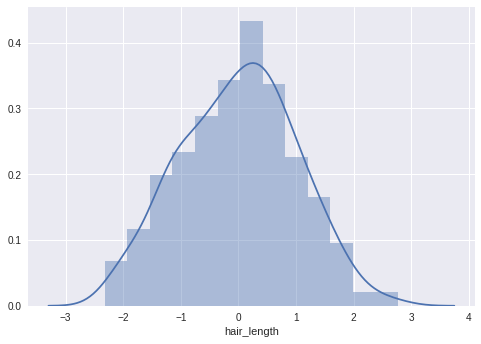

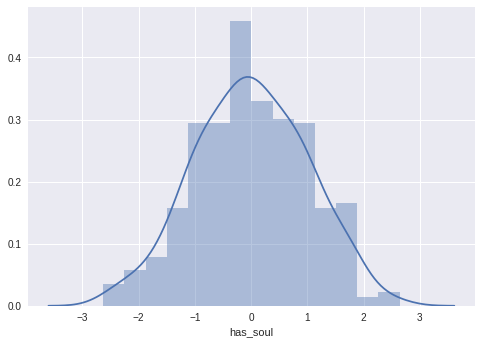

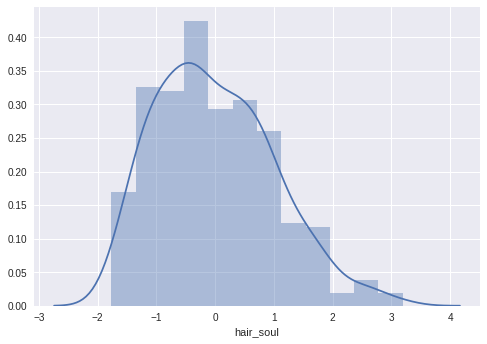

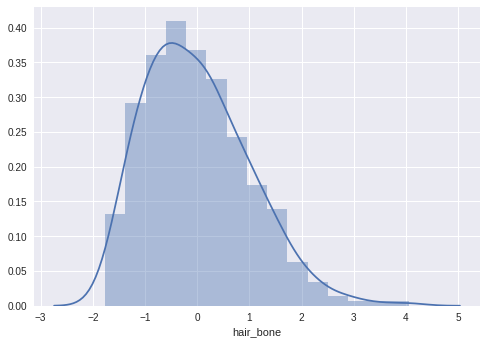

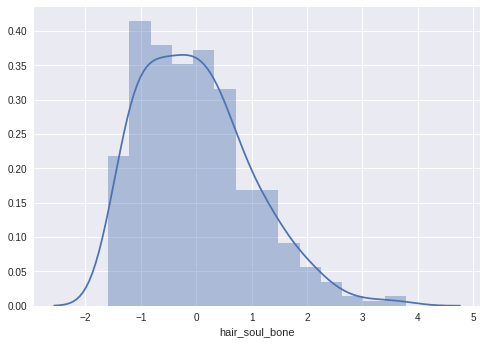

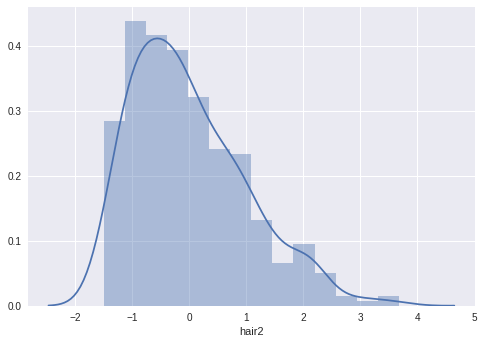

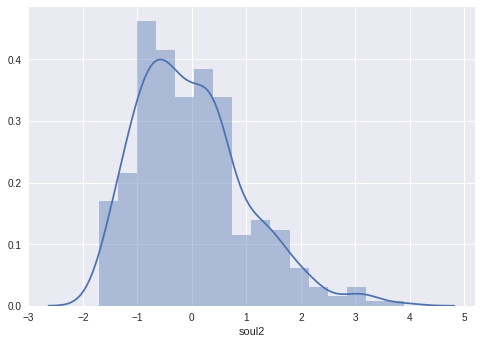

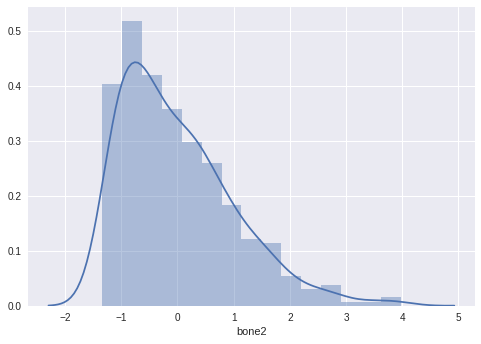

In [36]:
for col in train_data_sc.columns:
    sns.distplot(train_data_sc[col])
    plt.show()

In [41]:
train_data_x['color'].head()

0    clear
1    green
2    black
3    black
4    green
Name: color, dtype: object

In [0]:
train_color=train_data_x['color']

In [0]:
train_data_sc=pd.concat([train_data_sc,train_color],axis=1)

In [39]:
train_data_sc.head()

,bone_length,rotting_flesh,hair_length,has_soul,hair_soul,hair_bone,hair_soul_bone,hair2,soul2,bone2,color
0,-0.600418,-1.067386,-0.373386,1.761024,0.679213,-0.599233,-0.502765,2.106100,-0.678414,0.066321,clear
1,1.065931,-0.554049,0.013479,-0.179048,-0.202126,0.562905,-0.144358,-0.351794,1.056073,0.127819,green
2,0.254162,-1.043498,1.664981,1.818350,2.565361,1.172993,1.916327,2.199625,0.108120,1.961598,black
3,2.581850,0.012822,0.634464,2.348442,2.030205,2.121051,0.529607,3.121260,3.350157,3.475290,black
4,0.994744,2.524715,-0.651376,0.938337,0.019093,-0.005883,-0.731170,0.896068,0.965116,0.307691,green


In [0]:
train_data_sc = pd.get_dummies(train_data_sc,columns=['color'],drop_first=True).values

In [41]:
print(train_data_sc)

[[-0.60041788 -1.06738561 -0.37338608 ...  1.          0.
   0.        ]
 [ 1.06593116 -0.55404941  0.0134793  ...  0.          1.
   0.        ]
 [ 0.25416161 -1.0434982   1.6649809  ...  0.          0.
   0.        ]
 ...
 [ 0.35792208 -0.03900771 -0.19253577 ...  1.          0.
   0.        ]
 [-1.04947539  1.80922963  0.32054796 ...  1.          0.
   0.        ]
 [ 1.77936379  1.78995298  1.22683293 ...  0.          0.
   1.        ]]


In [42]:
train_data_sc = pd.DataFrame(train_data_sc)
train_data_sc.columns=['bone_length','rotting_flesh','hair_length','has_soul','hair_soul','hair_bone','hair_soul_bone','hair2','soul2','bone2','color1','color2','color3','color4','color5']
train_data_sc.head()

,bone_length,rotting_flesh,hair_length,has_soul,hair_soul,hair_bone,hair_soul_bone,hair2,soul2,bone2,color1,color2,color3,color4,color5
0,-0.600418,-1.067386,-0.373386,1.761024,0.679213,-0.599233,-0.502765,2.106100,-0.678414,0.066321,0.0,0.0,1.0,0.0,0.0
1,1.065931,-0.554049,0.013479,-0.179048,-0.202126,0.562905,-0.144358,-0.351794,1.056073,0.127819,0.0,0.0,0.0,1.0,0.0
2,0.254162,-1.043498,1.664981,1.818350,2.565361,1.172993,1.916327,2.199625,0.108120,1.961598,0.0,0.0,0.0,0.0,0.0
3,2.581850,0.012822,0.634464,2.348442,2.030205,2.121051,0.529607,3.121260,3.350157,3.475290,0.0,0.0,0.0,0.0,0.0
4,0.994744,2.524715,-0.651376,0.938337,0.019093,-0.005883,-0.731170,0.896068,0.965116,0.307691,0.0,0.0,0.0,1.0,0.0


In [0]:
test_data_minmax=mm_scaler.transform(test_data.drop(columns=['color']))

In [44]:
test_data_minmax = pd.DataFrame(test_data_minmax)
test_data_minmax.head()

,0,1,2,3,4,5,6,7,8,9
0,0.543332,0.349256,0.660373,0.743950,0.670029,0.438445,0.489306,0.557252,0.329704,0.480679
1,0.484544,0.656490,0.497987,0.477222,0.344857,0.308846,0.307306,0.232704,0.269504,0.223697
2,0.646283,0.473534,0.607566,0.475438,0.401883,0.480737,0.425707,0.231003,0.449461,0.336296
3,0.763342,0.701715,0.389194,0.375165,0.225845,0.392648,0.207875,0.145413,0.607805,0.220068
4,0.397808,0.583560,0.280398,0.288197,0.138371,0.159727,0.126497,0.087139,0.191554,0.075242


In [0]:
test_data_sc.describe()

In [0]:
test_color=test_data['color']

In [46]:
test_data_minmax.columns=['bone_length','rotting_flesh','hair_length','has_soul','hair_soul','hair_bone','hair_soul_bone','hair2','soul2','bone2']
test_data_minmax.head()

,bone_length,rotting_flesh,hair_length,has_soul,hair_soul,hair_bone,hair_soul_bone,hair2,soul2,bone2
0,0.543332,0.349256,0.660373,0.743950,0.670029,0.438445,0.489306,0.557252,0.329704,0.480679
1,0.484544,0.656490,0.497987,0.477222,0.344857,0.308846,0.307306,0.232704,0.269504,0.223697
2,0.646283,0.473534,0.607566,0.475438,0.401883,0.480737,0.425707,0.231003,0.449461,0.336296
3,0.763342,0.701715,0.389194,0.375165,0.225845,0.392648,0.207875,0.145413,0.607805,0.220068
4,0.397808,0.583560,0.280398,0.288197,0.138371,0.159727,0.126497,0.087139,0.191554,0.075242


In [0]:
test_data_sc=sc.transform(test_data_minmax)

In [48]:
test_data_sc=pd.DataFrame(test_data_sc)
test_data_sc.columns=['bone_length','rotting_flesh','hair_length','has_soul','hair_soul','hair_bone','hair_soul_bone','hair2','soul2','bone2']
test_data_sc.describe()

,bone_length,rotting_flesh,hair_length,has_soul,hair_soul,hair_bone,hair_soul_bone,hair2,soul2,bone2
count,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000
mean,-0.065480,-0.021975,-0.069701,-0.041480,-0.054836,-0.065307,-0.064227,-0.032721,-0.055525,-0.054643
std,1.025820,1.084779,1.012107,1.021416,1.014750,1.027376,0.978881,1.034398,1.025558,0.986995
min,-3.272877,-3.467756,-3.118441,-2.680011,-1.786168,-1.962711,-1.690624,-1.493292,-1.738719,-1.359269
25%,-0.789850,-0.772174,-0.830572,-0.752893,-0.933567,-0.877764,-0.865488,-0.815529,-0.823403,-0.917022
50%,-0.091750,0.022009,-0.052418,-0.057410,-0.115479,-0.192334,-0.208741,-0.238056,-0.236371,-0.246756
75%,0.639741,0.678084,0.681959,0.642756,0.654639,0.671670,0.586159,0.521642,0.533988,0.550658
max,4.265536,3.374044,2.774322,3.005302,3.477562,4.460832,3.783325,4.405588,6.697900,4.392585


In [0]:
test_data_sc=pd.concat([test_data_sc,test_color],axis=1)

In [0]:
test_data_sc = pd.get_dummies(test_data_sc,columns=['color'],drop_first=True).values

In [51]:
print(test_data_sc)

[[ 0.28355351 -0.81356831  1.04302179 ...  0.          0.
   0.        ]
 [-0.0514701   0.94536641  0.21478768 ...  0.          0.
   1.        ]
 [ 0.87024891 -0.1020656   0.77368484 ...  0.          0.
   0.        ]
 ...
 [ 0.57546309 -0.05816243  1.05441607 ...  0.          0.
   1.        ]
 [-0.77410315  1.77193093 -1.12515257 ...  1.          0.
   0.        ]
 [-1.33709417  1.26541795 -0.67139566 ...  0.          0.
   1.        ]]


In [52]:
test_data_sc = pd.DataFrame(test_data_sc)
test_data_sc.columns=['bone_length','rotting_flesh','hair_length','has_soul','hair_soul','hair_bone','hair_soul_bone','hair2','soul2','bone2','color1','color2','color3','color4','color5']
test_data_sc.head()

,bone_length,rotting_flesh,hair_length,has_soul,hair_soul,hair_bone,hair_soul_bone,hair2,soul2,bone2,color1,color2,color3,color4,color5
0,0.283554,-0.813568,1.043022,1.291392,1.556081,0.788009,1.039327,1.385092,0.139029,1.212622,0.0,0.0,0.0,0.0,0.0
1,-0.051470,0.945366,0.214788,-0.113311,-0.055996,0.032996,0.060807,-0.290996,-0.198084,-0.153305,0.0,0.0,0.0,0.0,1.0
2,0.870249,-0.102066,0.773685,-0.122705,0.226714,1.034388,0.697389,-0.299782,0.809665,0.445186,0.0,0.0,0.0,0.0,0.0
3,1.537346,1.204286,-0.340098,-0.650784,-0.646009,0.521207,-0.473780,-0.741803,1.696379,-0.172598,0.0,0.0,0.0,0.0,1.0
4,-0.545764,0.527837,-0.895004,-1.108796,-1.079672,-0.835737,-0.911310,-1.042753,-0.634603,-0.942388,0.0,0.0,0.0,0.0,0.0


In [53]:
train_data_y=pd.DataFrame(train_data_y)
train_data_y.columns=['type']
train_data_y.head()

,type
0,1
1,2
2,1
3,1
4,0


In [0]:
#test_data_x = pd.get_dummies(test_data, columns=['color'], drop_first=True).values
#print(test_data_x)

이전에 작업했던 코드

# RandomForest

In [0]:
rf_params = {'n_estimators':[10,100,1000,2000], 'max_features': [2,3,4,5],'bootstrap':[False]}
rfclf = RandomForestClassifier(n_estimators=500)

In [70]:
feat_labels= train_data_minmax[::]
rfclf.fit(train_data_minmax,train_data_y)
importances = rfclf.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(train_data_minmax.shape[1]):
  print('%2d)%-*s %f' %(f+1,30,
                        feat_labels[indices[f]],
                        importances[indices[f]]))
plt.title('Feature Importance')
plt.bar(range(train_data_minmax.shape[1]),
              importances[indices],
              align='center')

plt.xticks(range(train_data_minmax.shape[1]),
           feat_labels[indices],rotation=90)
plt.xlim([-1,train_data_minmax.shape[1]])
plt.tight_layout()
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


KeyError: ignored

In [0]:
best_features = train_data_x.columns[indices[0:7]]
train_data_x = train_data_x[best_features]
test_data = test_data[best_features]

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

# XGBOOST

In [54]:
from xgboost import XGBClassifier
params={'max_depth':[2,3,4,5,6,10,15,20],'learning_rate':[0.001,0.01,0.1,0.5,1]}
xgb_clf = XGBClassifier(objective="multi:softprob", max_depth=6, learning_rate=0.001)
xgb_clf = GridSearchCV(xgb_clf,params,refit='True',n_jobs=-1,cv=5)
xgb_clf.fit(train_data_sc,train_data_y)
## eta=0.001,max_depth=6

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.001, max_delta_step=0,
                                     max_depth=6, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='multi:softprob',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.5, 1],
                         'max_depth': [2, 3, 4, 5, 6, 10, 15, 20]},
             pre_dispatch='2*n_jobs', re

In [0]:
from sklearn.model_selection import cross_val_predict
xgb_train_y_pred=cross_val_predict(xgb_clf,train_data_sc,train_data_y.values.ravel(),cv=10)

In [0]:
from sklearn.metrics import confusion_matrix
confu_xgb=confusion_matrix(train_data_y,xgb_train_y_pred)

In [57]:
print(confu_xgb)

[[93  2 22]
 [ 2 98 29]
 [19 36 70]]


In [58]:
from sklearn.model_selection import cross_val_score
cross_val_score(xgb_clf,train_data_sc,train_data_y.values.ravel(),cv=10,scoring="accuracy")

array([0.71052632, 0.72972973, 0.81081081, 0.7027027 , 0.67567568,
       0.7027027 , 0.64864865, 0.67567568, 0.83783784, 0.54054054])

In [0]:
xgb_y_pred=xgb_clf.predict(test_data_sc)
submission['type']=xgb_y_pred

In [0]:
submission['type'] = submission.type.map({0:"Ghost", 1:"Ghoul", 2:"Goblin"})

In [0]:
submission.to_csv('/content/drive/My Drive/Colab Notebooks/Ghouls/xgb_submission(sc).csv', index=False)

In [62]:
params = {'n_estimators':[10,100,1000,2000], 'max_features': [2,3,4,5,10,11,15],'bootstrap':[False]}
rfclf = RandomForestClassifier(n_estimators=10)
rf_clf = GridSearchCV(rfclf, params, refit='True', n_jobs=-1, cv=10)
rf_clf.fit(train_data_sc, train_data_y)

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


KeyboardInterrupt: ignored

In [79]:
rf_clf.best_params_

{'bootstrap': False, 'max_features': 2, 'n_estimators': 10}

In [63]:
rf_clf=RandomForestClassifier(n_estimators=10,max_features=2,bootstrap=False)
rf_clf.fit(train_data_sc,train_data_y.values.ravel())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
rf_y_pred=rf_clf.predict(test_data_sc)
submission['type']=rf_y_pred

In [0]:
from sklearn.model_selection import cross_val_predict
rf_train_y_pred=cross_val_predict(rf_clf,train_data_sc,train_data_y.values.ravel(),cv=10)

In [0]:
from sklearn.metrics import confusion_matrix
confu_rf=confusion_matrix(train_data_y,rf_train_y_pred)

In [67]:
print(confu_rf)

[[94  1 22]
 [ 3 88 38]
 [25 37 63]]


In [68]:
from sklearn.model_selection import cross_val_score
cross_val_score(rf_clf,train_data_sc,train_data_y.values.ravel(),cv=10,scoring="accuracy")

array([0.57894737, 0.78378378, 0.67567568, 0.64864865, 0.75675676,
       0.7027027 , 0.7027027 , 0.72972973, 0.75675676, 0.51351351])

In [0]:
submission['type'] = submission.type.map({0:"Ghost", 1:"Ghoul", 2:"Goblin"})

In [0]:
submission.to_csv('/content/drive/My Drive/Colab Notebooks/Ghouls/rf_submission.csv', index=False)

Naive Bayes

In [72]:
from sklearn import naive_bayes
nb_clf=naive_bayes.GaussianNB()
nb_clf.fit(train_data_sc,train_data_y.values.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
nb_y_pred=nb_clf.predict(test_data_sc)

In [0]:
submission['type'] = nb_y_pred
submission['type'] = submission.type.map({0:"Ghost", 1:"Ghoul", 2:"Goblin"})

In [0]:
submission.to_csv('/content/drive/My Drive/Colab Notebooks/Ghouls/nb_submission(sc).csv', index=False)

In [77]:
params = {'C':[0.001, 0.01, 1, 10, 100, 500, 1000, 2000], 'tol': [0.0001, 0.001, 0.005]}
log_reg = LogisticRegression(solver='newton-cg', multi_class='multinomial')
log_clf = GridSearchCV(log_reg, params, refit='True', n_jobs=-1, cv=10)
log_clf.fit(train_data_sc, train_data_y.values.ravel())
## C=1, tol=0.0001 로 best param을 찾음

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100,
                                          multi_class='multinomial',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='newton-cg',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 1, 10, 100, 500, 1000, 2000],
                         'tol': [0.0001, 0.001, 0.005]},
             pre_dispatch='2*n_jobs', refit='True', return_train_score=False,
             scoring=None, verbose=0)

In [0]:
log_y_pred=log_clf.predict(test_data_sc)
submission['type']=log_y_pred
submission['type'] = submission.type.map({0:"Ghost", 1:"Ghoul", 2:"Goblin"})

In [0]:
submission.to_csv('/content/drive/My Drive/Colab Notebooks/Ghouls/log_submission(sc).csv', index=False)